# 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2022/Python 데이터 분석 라이브러리_20220423/Basic/Machine Learning/News Classification/data/'

train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# 시각화

0    4342
1    3271
Name: target, dtype: int64


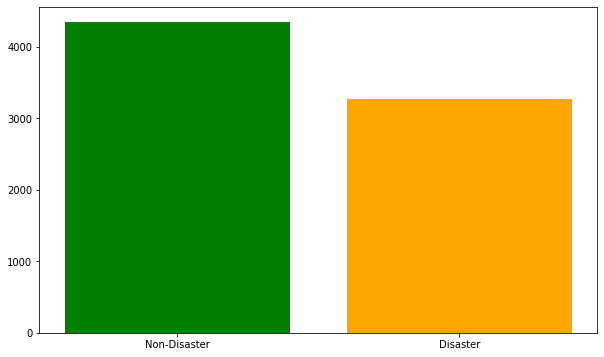

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print(train['target'].value_counts())
news_class = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, news_class, color=['green', 'orange'])

fig.show()

- 각 그룹에 따라서 텍스트의 길이를 비교할 수 있음

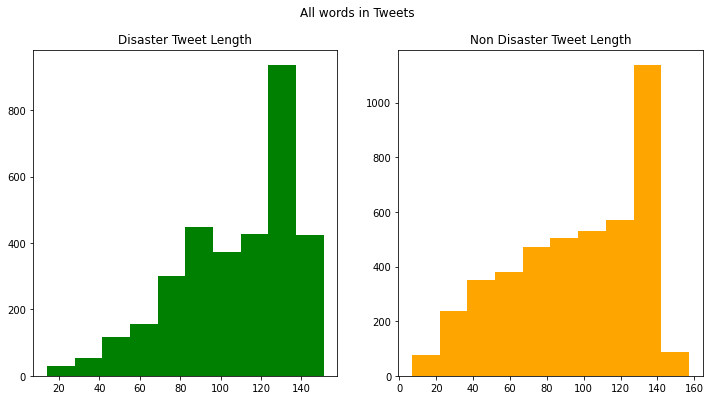

In [5]:
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(disaster_tweet_len, color='green')
ax[0].set_title("Disaster Tweet Length")

ax[1].hist(non_disaster_tweet_len, color='orange')
ax[1].set_title("Non Disaster Tweet Length")

fig.suptitle('All words in Tweets')
plt.show()

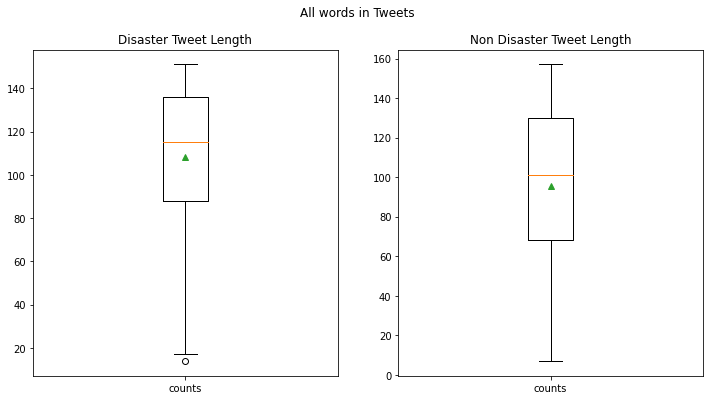

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(disaster_tweet_len, labels=['counts'], showmeans=True)
ax[0].set_title("Disaster Tweet Length")

ax[1].boxplot(non_disaster_tweet_len, labels=['counts'], showmeans=True)
ax[1].set_title("Non Disaster Tweet Length")

fig.suptitle('All words in Tweets')
plt.show()

In [7]:
import numpy as np
disaster_tweet_len = train[train['target']==1]['text'].str.len()
non_disaster_tweet_len = train[train['target']==0]['text'].str.len()

print("Max Length of Disaster Tweet: {}".format(np.max(disaster_tweet_len)))
print("Min Length of Disaster Tweet: {}".format(np.min(disaster_tweet_len)))
print("Mean Length of Disaster Tweet: {:.2f}".format(np.mean(disaster_tweet_len)))
print("Median Length of Disaster Tweet: {}".format(np.median(disaster_tweet_len)))

print("Max Length of Non Disaster Tweet: {}".format(np.max(non_disaster_tweet_len)))
print("Min Length of Non Disaster Tweet: {}".format(np.min(non_disaster_tweet_len)))
print("Mean Length of Non Disaster Tweet: {:.2f}".format(np.mean(non_disaster_tweet_len)))
print("Median Length of Non Disaster Tweet: {}".format(np.median(non_disaster_tweet_len)))

Max Length of Disaster Tweet: 151
Min Length of Disaster Tweet: 14
Mean Length of Disaster Tweet: 108.11
Median Length of Disaster Tweet: 115.0
Max Length of Non Disaster Tweet: 157
Min Length of Non Disaster Tweet: 7
Mean Length of Non Disaster Tweet: 95.71
Median Length of Non Disaster Tweet: 101.0


- 워드 클라우드

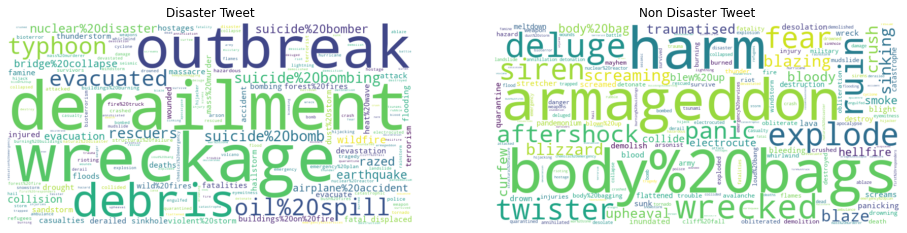

In [8]:
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Disaster Tweet")
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Non Disaster Tweet")
fig.show()

## Feature Engineering

In [11]:
import pandas as pd
def check_na(data):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio': data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data)

check_na(train)
check_na(test)

결측치 데이터 컬럼과 건수:
           Missing Ratio Data Type
location      33.272035    object
keyword        0.801261    object
결측치 데이터 컬럼과 건수:
           Missing Ratio Data Type
location      33.864542    object
keyword        0.796813    object


- 특정 변수들은 제거

In [12]:
test_id = test['id']
train_id = train['id']

for datas in [train, test]:
  datas = datas.drop(['id', 'keyword', 'location'], axis=1, inplace=True)

train.shape, test.shape

((7613, 2), (3263, 1))

# Text Cleansing
- HTML 태그 제거
- 특수문자 공백으로 바꾸기
- 대문자를 소문자로 바꾸기
- 불용어 제거하기
  : I have a dream, I lived in NY, I 

### remove_url

In [13]:
import re # 정규표현식 라이브러리

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

sample_text = "새로운 캐글 대회가 열렸습니다. 주소: https://www.kaggle.com/c/nlp-getting-started"
remove_url(sample_text)

'새로운 캐글 대회가 열렸습니다. 주소: '

- remove_html
<a> </p>

In [14]:
def remove_html(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)

sample_text ="""<div>
<h1> Real News or Fake News </h1>
<p> Kaggle Machine Learning </p>
</div>"""

print(remove_html(sample_text))


 Real News or Fake News 
 Kaggle Machine Learning 



In [16]:
!pip install emoji --upgrade

     |████████████████████████████████| 175 kB 11.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=0984f75e5ac1cc8113c709c9118471da9b89427044720735b8312b61c8adc900
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [17]:
import emoji
print(emoji.emojize('Phd is very easy!!! :thumbs_up:'))

Phd is very easy!!! 👍


In [18]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

remove_emoji("Hello, 👍")

'Hello, '

- Remove Special Letters

In [19]:
def remove_punct(text):
  return re.sub("[^a-zA-Z]", " ", text)

sample_text = "Hello!, Can I have one question?.., Is it #Outbreak?"
remove_punct(sample_text)

'Hello   Can I have one question     Is it  Outbreak '

In [20]:
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def data_cleansing(text, remove_stopwords = False):
  # remove url 
  url = re.compile(r'https?://\S+|www\.\S+')
  cleaned_text = url.sub(r'', text)

  # remove html
  html = re.compile(r'<.*?>')
  cleaned_text = html.sub(r'', cleaned_text)

  # remove emoji
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'', cleaned_text)

  # Special Letters to empty space
  cleaned_text = re.sub("[^a-zA-Z]", " ", cleaned_text)

  # Lowercase
  cleaned_text = cleaned_text.lower().split()

  if remove_stopwords:
    stops = set(stopwords.words("english"))
    cleaned_text = [word for word in cleaned_text if not word in stops]
    clean_review = ' '.join(cleaned_text)
  else:
    clean_review = ' '.join(cleaned_text)

  return clean_review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
clean_train_reviews = []
for datas in [train, test]:
    datas['cleaned_text'] = datas['text'].apply(lambda x : data_cleansing(x, remove_stopwords=True))

In [22]:
train.head()

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


# 토큰화 (Tokenizer)
- 문자를 머신러닝 수식에 못 넣음! 
- 문자를 수식으로 변환! 
- 문장을 다이렉트로 수식으로 넣을 수 없음
- 문장을 쪼개야 함 --> 숫자로 변환

고전적인 머신러닝 방법
- CountVectorizer (참고)
- TF-IDF Vectorizer (반드시 기억!)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['As you know, I want to be with you, I love you']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) 
print(vector.vocabulary_)

[[1 1 1 1 1 1 1 3]]
{'as': 0, 'you': 7, 'know': 2, 'want': 5, 'to': 4, 'be': 1, 'with': 6, 'love': 3}


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['Can I have lunch with you?', 
          'No, I cannot have it with you.', 
          'Because, I need to study later']
tfidfv = TfidfVectorizer().fit(corpus)
print(np.round(tfidfv.transform(corpus).toarray(), 2))
print(tfidfv.vocabulary_)

[[0.   0.52 0.   0.39 0.   0.   0.52 0.   0.   0.   0.   0.39 0.39]
 [0.   0.   0.46 0.35 0.46 0.   0.   0.   0.46 0.   0.   0.35 0.35]
 [0.45 0.   0.   0.   0.   0.45 0.   0.45 0.   0.45 0.45 0.   0.  ]]
{'can': 1, 'have': 3, 'lunch': 6, 'with': 11, 'you': 12, 'no': 8, 'cannot': 2, 'it': 4, 'because': 0, 'need': 7, 'to': 10, 'study': 9, 'later': 5}
